# Summary

Finally, we present two simplified models to play with.

## Model with current in pA

\begin{align}
I_\text{leak} = \frac{V_m - E_\text{leak}}{R_\text{leak}}
\end{align}

\begin{align}
C_m\dot{V}_m = \frac{V_\text{ref} +E_\text{off}^\dagger - V_m}{R_s} - I - I_\text{leak}
\end{align}

\begin{align}
\dot{V}_\text{est} &= \frac{V_c - V_\text{est}}{(1 - \beta)R_s^*C_m^*}   
\end{align}

\begin{align}
\tau_\text{sum}\dot{V}_\text{ref} = V_c + \alpha R_s^* I_\text{obs} + \beta R_s^* C_m^* \dot{V}_\text{est} - V_\text{ref}
\end{align}

\begin{align}
\tau_f \dot{I}_\text{obs} &= I + I_\text{leak} + C_m\dot{V}_m - C_m^* \dot{V}_\text{est} - I_\text{obs}
\end{align}

In [1]:
import myokit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m1 = myokit.parse_model('''
[[model]]
desc: """
    Simplified model without fast capacitance or amplifier speed.
    Written in the Lei et al. style, using dot(I_obs).
"""
amp.Vm = -80
amp.Ve = -80
amp.Vr = -80
amp.I_obs = 0

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
alpha = 0.7
beta = alpha
Rs = 6e-3 [GOhm] in [GOhm]
Rs_est = 6e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cm_est = 25 [pF] in [pF]
tau_f = 0.075 [ms] in [ms]
tau_sum = 0.01 [ms] in [ms]
E_leak = 0 [mV] in [mV]
R_leak = 1 [GOhm] in [GOhm]
E_off = 0 [mV] in [mV]
I = 10 [nS] * Vm
    in [pA]
I_leak = 0 * (Vm - E_leak) / R_leak
    in [pA]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vr + E_off - Vm) / (Rs * Cm) - (I + I_leak) / Cm
    in [mV]
dot(Ve) = (Vc - Ve) / ((1 - beta) * Rs_est * Cm_est)
    in [mV]
dot(Vr) = (Vc + alpha * Rs_est * I_obs + beta * Rs_est * Cm_est * dot(Ve) - Vr) / tau_sum
    in [mV]
dot(I_obs) = (I + I_leak + Cm * dot(Vm) - Cm_est * dot(Ve) - I_obs) / tau_f
    in [pA]
''')
m1.check_units(myokit.UNIT_STRICT)

With a user defined $I=I(V_m)$, an input $V_c$, and the following parameters:

| Parameter              | Meaning                     | Source       | Approximation   | Chosen value |
|:-----------------------|:----------------------------|:-------------|-----------------|--------------|
| $C_m$                  | Membrane capacitance        | Unknown      | $C_m^*$         | 25 pF        |
| $C_m^*$                | Estimated $C_m$             | User setting |                 | 25 pF        |
| $R_s$                  | Series resistance           | Unknown      | $R_s^*$         | 6 MOhm       |
| $R_s^*$                | Estimated $R_s$             | User setting |                 | 6 MOhm       |
| $\tau_f$               | Feedback time constant      | Hardware     |                 | 0.075 ms     |
| $\tau_\text{sum}$      | $R_s$ compensation lag      | User setting |                 | 0.01 ms      |
| $\alpha$               | $R_s$ compensation fraction | User setting |                 | 0.7          |
| $\beta$                | $R_s$ prediction fraction   | User setting |                 | alpha        |
| $E_\text{off}^\dagger$ | Remaining voltage offset    | Unknown      | 0               | 0 mV         |
| $E_\text{leak}$        | Leak offset                 | Unknown      | 0               | 0 mV         |
| $R_\text{leak}$        | Leak resistance             | Unknown      | $R_\text{seal}$ | 1 GOhm       |

See [Appendix C3](appendix-C3-parameter-values) for more common values.

## Model with current in A/F

\begin{align}
\bar{I}_\text{leak} = = \frac{1}{C'_m R_\text{leak}} (V_m - E_\text{leak}) = 
 \tilde{g}_\text{leak} (V_m - E_\text{leak})
\end{align}

\begin{align}
\dot{V}_m = \frac{V_\text{ref} +E_\text{off}^\dagger - V_m}{R_s C_m} - \frac{C_m'}{C_m}(\tilde{I} + \tilde{I}_\text{leak})
\end{align}

\begin{align}
\dot{V}_\text{est} &= \frac{V_c - V_\text{est}}{(1 - \beta)R_s^*C_m^*}   
\end{align}

\begin{align}
\tau_\text{sum}\dot{V}_\text{ref} = V_c + \alpha R_s^* C_m' \tilde{I}_\text{obs} + \beta R_s^* C_m^* \dot{V}_\text{est} - V_\text{ref}
\end{align}

\begin{align}
\tau_f \dot{\tilde{I}}_\text{obs} &= \tilde{I} + \tilde{I}_\text{leak} + \frac{C_m}{C_m'}\dot{V}_m - \frac{C_m^*}{C_m'} \dot{V}_\text{est} - \tilde{I}_\text{obs}
\end{align}

In [3]:
m2 = myokit.parse_model('''
[[model]]
desc: """
    Simplified model without fast capacitance or amplifier speed.
    Written in the Lei et al. style, using dot(I_obs).
    With normalised currents.
"""
amp.Vm = -80
amp.Ve = -80
amp.Vr = -80
amp.I_obs = 0

[engine]
time = 0 [ms] in [ms] bind time
pace = 0 bind pace

[amp]
alpha = 0.7
beta = alpha
Rs = 6e-3 [GOhm] in [GOhm]
Rs_est = 6e-3 [GOhm] in [GOhm]
Cm = 25 [pF] in [pF]
Cm_est = 25 [pF] in [pF]
Cm_nor = Cm_est in [pF]
tau_f = 0.075 [ms] in [ms]
tau_sum = 0.01 [ms] in [ms]
E_leak = 0 [mV] in [mV]
g_leak = 0.04 [nS/pF] in [nS/pF]
E_off = 0 [mV] in [mV]
I = 0.4 [nS/pF] * Vm
    in [A/F]
I_leak = g_leak * (Vm - E_leak)
    in [A/F]
Vc = engine.pace * 1 [mV]
    in [mV]
dot(Vm) = (Vr + E_off - Vm) / (Rs * Cm) - (I + I_leak) * (Cm_nor / Cm)
    in [mV]
dot(Ve) = (Vc - Ve) / ((1 - beta) * Rs_est * Cm_est)
    in [mV]
dot(Vr) = (Vc + alpha * Rs_est * Cm_nor * I_obs + beta * Rs_est * Cm_est * dot(Ve) - Vr) / tau_sum
    in [mV]
dot(I_obs) = (I + I_leak + Cm / Cm_nor * dot(Vm) - Cm_est / Cm_nor * dot(Ve) - I_obs) / tau_f
    in [A/F]
''')
m2.check_units(myokit.UNIT_STRICT)

With additional parameters:

| Parameter               | Meaning                     | Source       | Chosen value |
|:------------------------|:----------------------------|:-------------|--------------|
| $C_m' $                 | $C_m$ used in normalisation | User setting | 25 pF        |
| $\tilde{g}_\text{leak}$ | Normalised leak conductance | Unknown      | 0.04 nS/pF   |


## Simulations

In [4]:
vlo, vhi = -80, 20
p = myokit.Protocol()
p.add_step(level=vlo, duration=5)
p.add_step(level=vhi, duration=15)

In [5]:
tol = 1e-8

t0 = 10
t1 = 4.9
t2 = 6

s1 = myokit.Simulation(m1, p)
s1.set_tolerance(tol, tol)
s1.pre(t1)
d1 = s1.run(t0)

s2 = myokit.Simulation(m2, p)
s2.set_tolerance(tol, tol)
s2.pre(t1)
d2 = s2.run(t0)

In [6]:
def axs(fig, sub=(1, 1, 1), xlabel='Time (ms)', ylabel=''):
    ax = fig.add_subplot(*sub)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

def ins(ax, loc=(0.05, 0.20, 0.40, 0.65)):
    ins = ax.inset_axes(loc)
    ins.set_yticklabels([])
    ins.set_xlim(t1, t2)
    ins.patch.set_alpha(0.5)    
    return ins

def plot(d, label='ff', ls='-'):
    fig = plt.figure(figsize=(15, 12))
    
    ax1 = axs(fig, (2, 2, 1), 'V (mV)')
    ax2 = axs(fig, (2, 2, 2), 'Iobs (mV)')
    in1 = ins(ax1)
    in1.set_xlim(4.9, 7)
    in1.set_ylim(12, 28)
    
    ax1.plot(d.time(), d['amp.Vm'], label='Vm')
    ax1.plot(d.time(), d['amp.Ve'], label='Vest')
    ax1.plot(d.time(), d['amp.Vr'], label='Vref')
    ax1.legend()
    in1.plot(d.time(), d['amp.Vm'])
    in1.plot(d.time(), d['amp.Ve'])
    in1.plot(d.time(), d['amp.Vr'])
    
    ax2.plot(d.time(), d['amp.I_obs'], ls=ls)

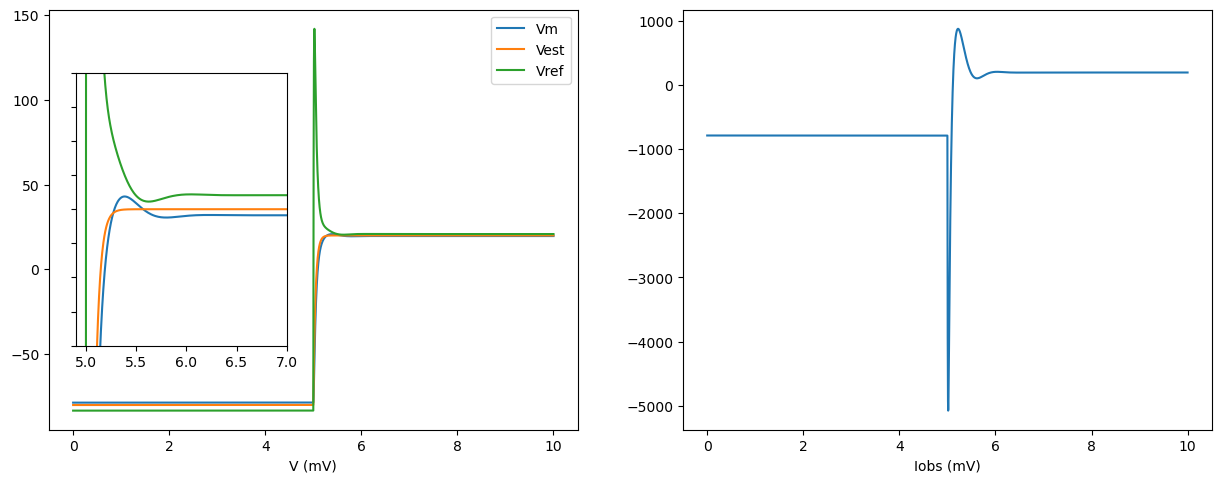

In [7]:
plot(d1)

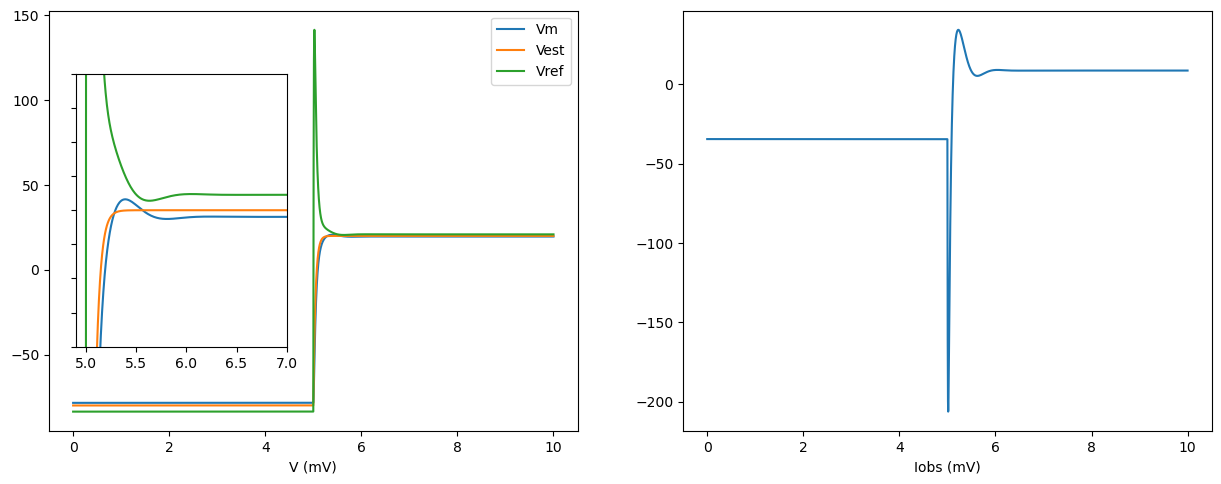

In [8]:
plot(d2)